In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("D:\DS\MLR\MLR\ToyotaCorolla - MLR.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_11268\1262347647.py:14: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DS\MLR\MLR\ToyotaCorolla - MLR.csv")


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
# Perform one-hot encoding for 'FuelType'
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Display dataset information
print("\nDataset information:")
print(df.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 115.1 KB
None



Summary statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

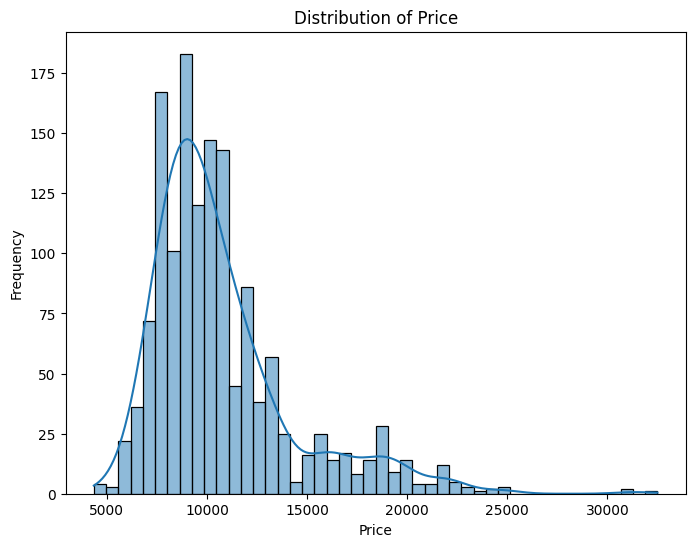

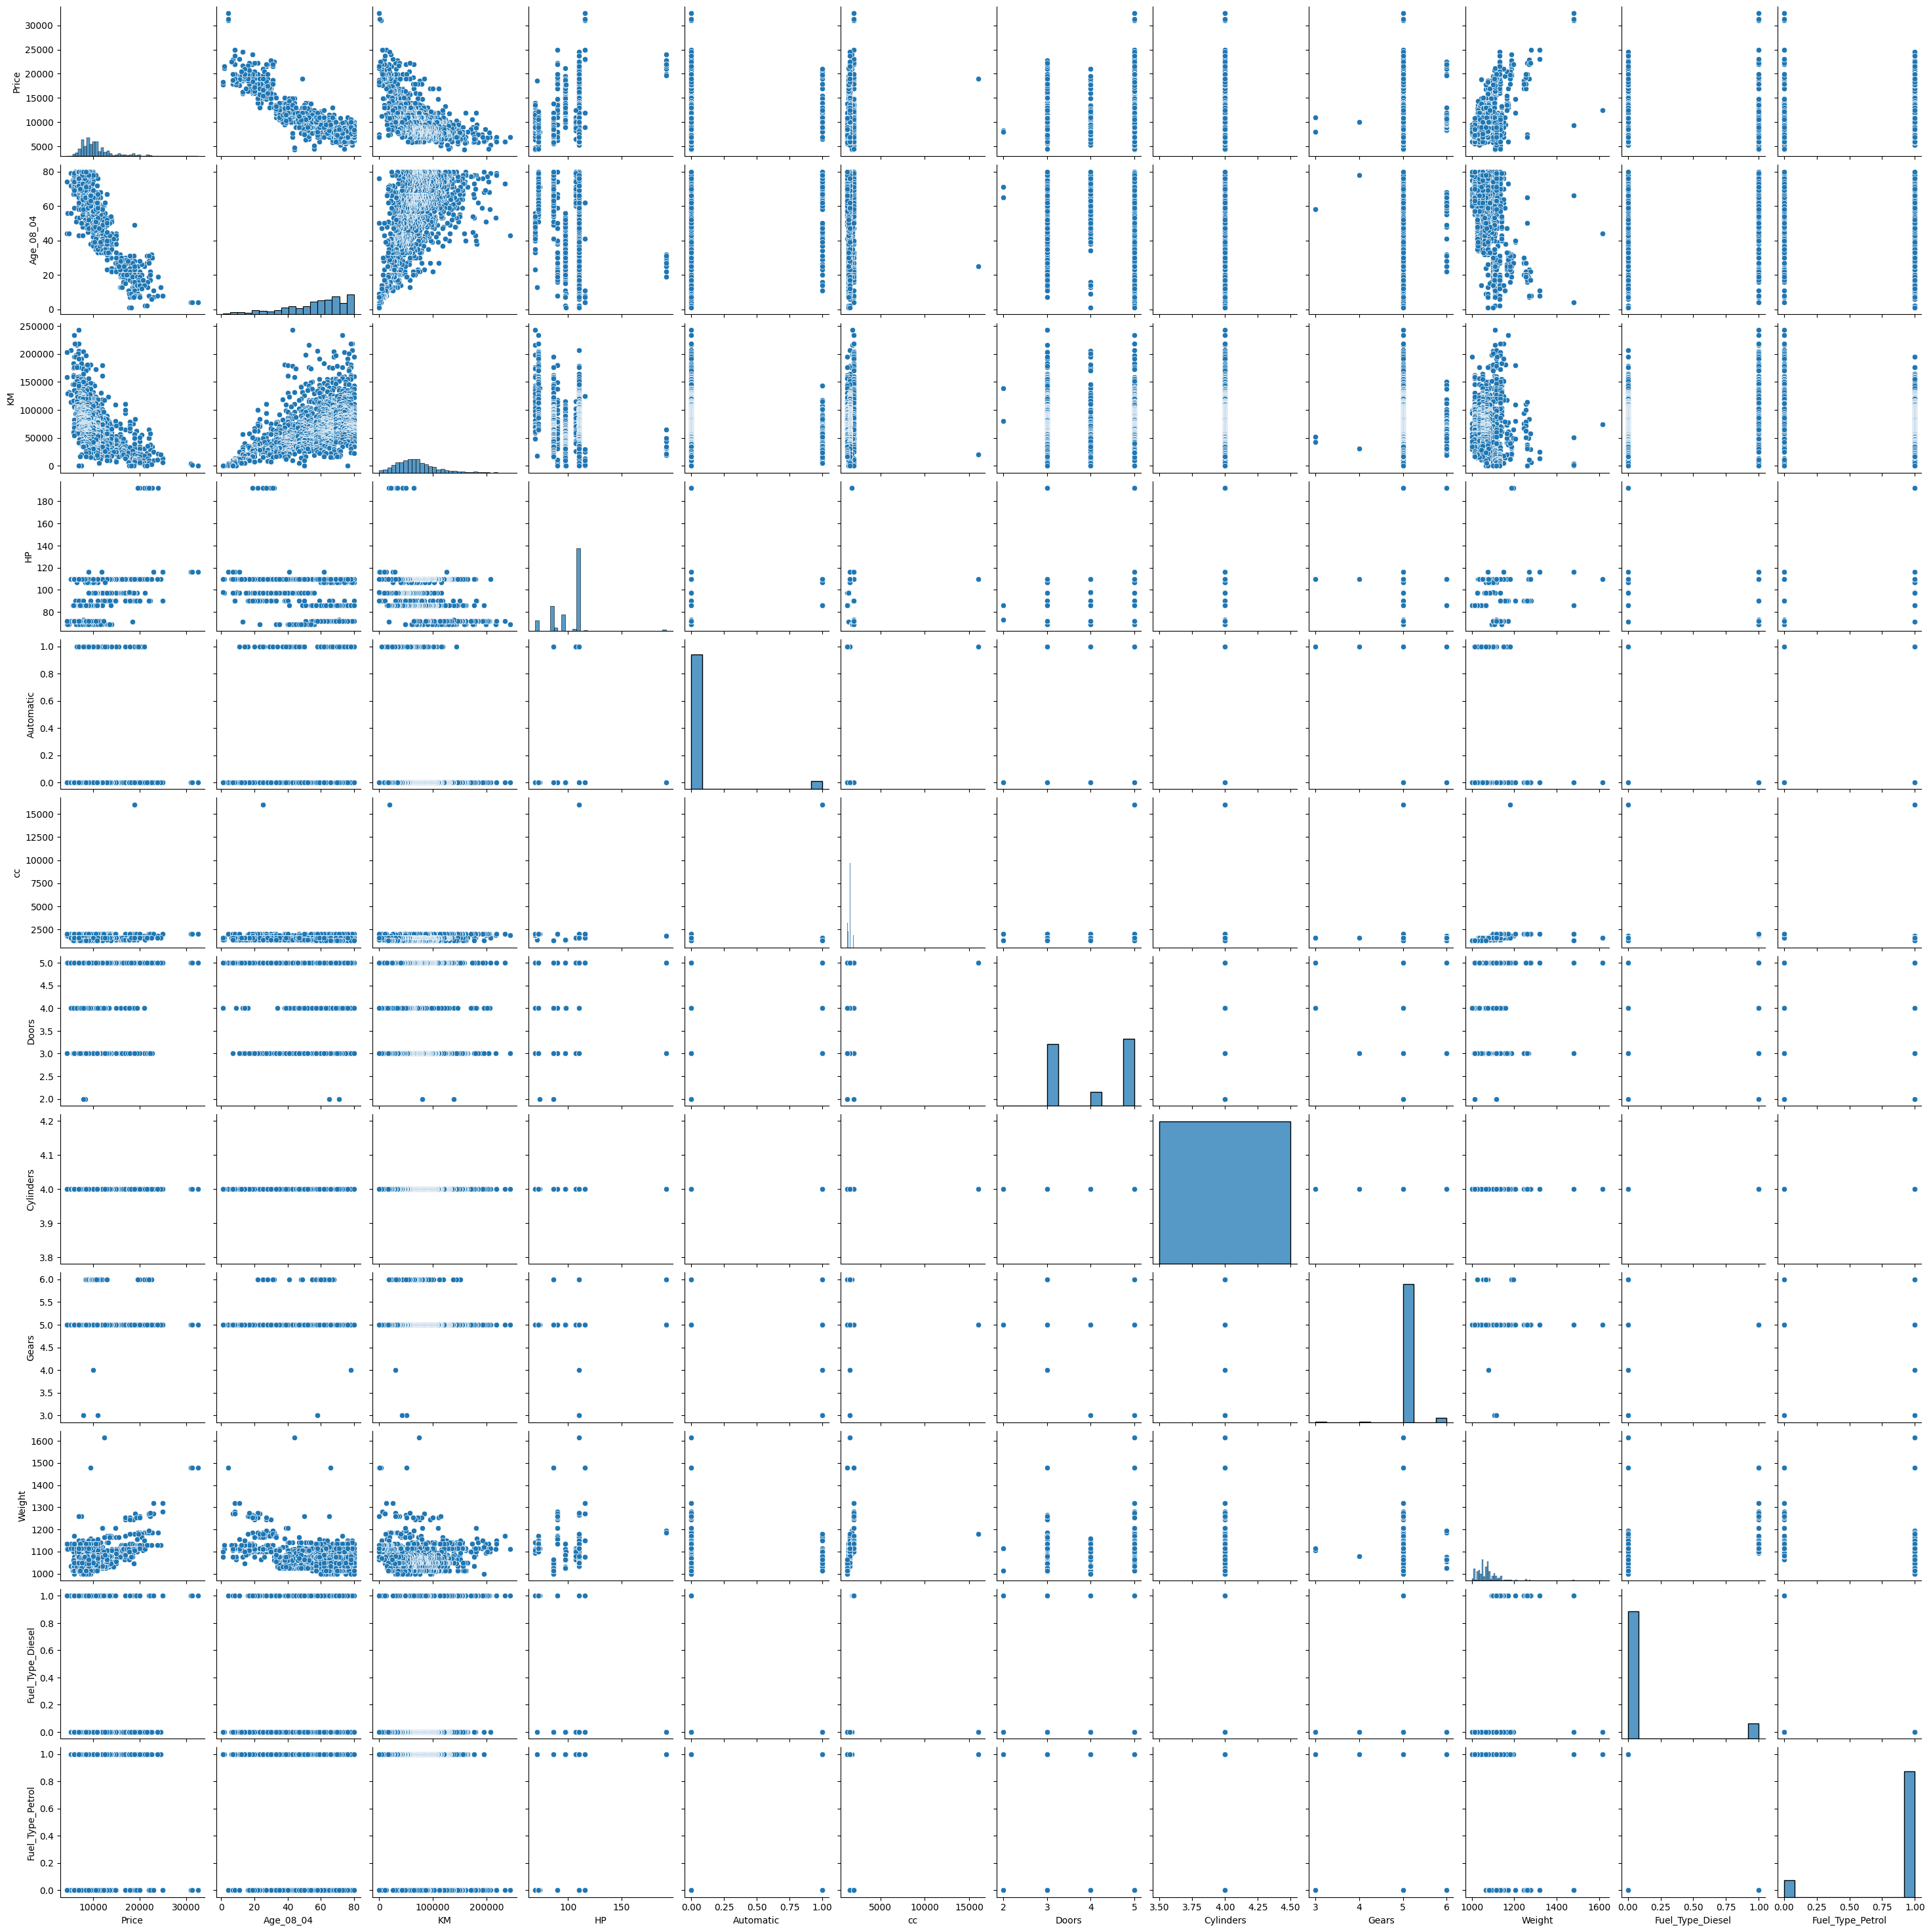

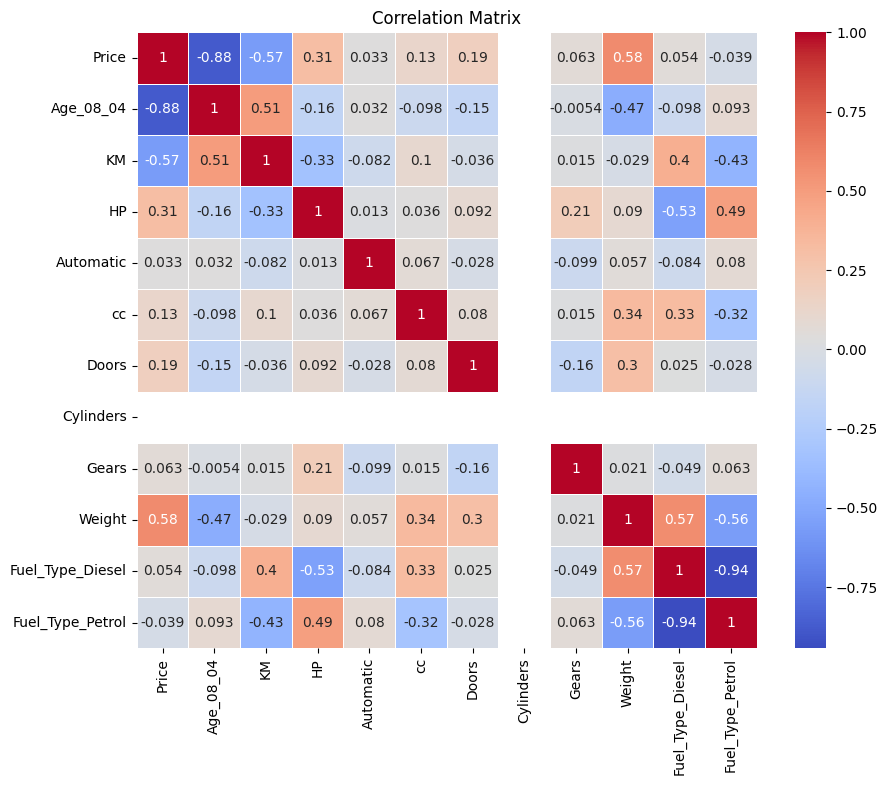

In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


In [9]:
# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']


In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing set sizes:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")



Training and testing set sizes:
Training set: 1148 samples
Testing set: 288 samples


In [11]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
print("\nModel coefficients:")
print(coefficients)

# Predictions on the testing set
y_pred = lr_model.predict(X_test)



Model coefficients:
             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders  1.250555e-12
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


In [12]:
# Interpreting the model
print("\nIntercept of the model:")
print(lr_model.intercept_)

print("\nCoefficients of the model:")
print(coefficients)



Intercept of the model:
-14255.385993565258

Coefficients of the model:
             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders  1.250555e-12
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


In [13]:
# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel evaluation:")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")



Model evaluation:
R-squared: 0.8348888040611084
Mean Squared Error: 2203043.8231437006


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso and Ridge models
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)

# Fit the models on the training data
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Predictions on the testing set
lasso_pred = lasso_model.predict(X_test_scaled)
ridge_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared and MSE for Lasso
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nLasso regression evaluation:")
print(f"R-squared: {lasso_r2}")
print(f"Mean Squared Error: {lasso_mse}")

# Calculate R-squared and MSE for Ridge
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("\nRidge regression evaluation:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Squared Error: {ridge_mse}")



Lasso regression evaluation:
R-squared: 0.8351178206648817
Mean Squared Error: 2199988.102957851

Ridge regression evaluation:
R-squared: 0.8350462635431564
Mean Squared Error: 2200942.8745232965


**Assumptions Made  During the Analysis**
1. The relationship  between the independent variable and the dependent variable is assumed to be linear
2. The observations are assumed to be independent of each  other
3. The residuals are assumed to have constant variance
4. The residuals of the model are assumed to be normally distributed
5. The independent variables are assumed to not be highly correlated with each other

**Conclusion**
The regression models effectively predict Toyota Corolla prices using key features like Age,KM,HP and Fuel Type with lasso and Ridge preventing overfitting and maintaining prediction reliability 

**Interview Questions:**
1.What is Normalization & Standardization and how is it helpful?
Answer :
    a. Normalization : scales data to a fixed range typically[0,1] it helps when data is on different scales making it easier to compare features and improve the performance of algorithms that rely on distance metrics
    b. Standardization : transforms data to have a mean of 0 and a standard deviation of 1 it's useful when features have different units or distributions and it helps in algorithms that assume normally distributed data
        
2.What techniques can be used to address multicollinearity in multiple linear regression?
Answer : 
    a. Removehighly correlated predictors : eliminate one of the variables from a group of highly correlated variables 
    b. principal Component Analysis : Transform the predictors into a set of uncorrelated components 
    c. Regularization : Apply techniques like Lasso or Ridge regresssion to penalize large coefficients and reduce the effect of multicollinearity